# **Student Performance Indicator**

## My Tasks For This Notebook
- Load data
- Checking the shape
- Handle Missing Values
- Removing Duplicates
- Observing Data Through EDA

### Importing Necessary Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading CSV data as Pandas DataFrame

In [29]:
df = pd.read_csv('data/StudentsPerformance.csv')

### Accessing top 5 rows

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Observing Data 

- gender -> (male/female)
- race/ethnicity -> group [A, B, C, D, E]
- parental level of education -> ["bachelor's degree", 'some college', "master's
degree","associate's degree", 'high school', 'some high school']
- lunch -> (standard, free/reduced)
- test preparation course -> (none, completed)
- math score -> continous value
- reading score -> continous value
- writing score -> continous value

# EDA Starts

### Searching for any Missing Values

In [31]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Finding Duplicates

In [32]:
df.duplicated().sum()

0

### Checking the shape of the DataFrame

In [33]:
df.shape

(1000, 8)

### Checking Data Types

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Statistical Understanding Of Numerical Columns

In [35]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Checking the value counts of Categorical Columns

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### For Gender Column

<Axes: xlabel='gender'>

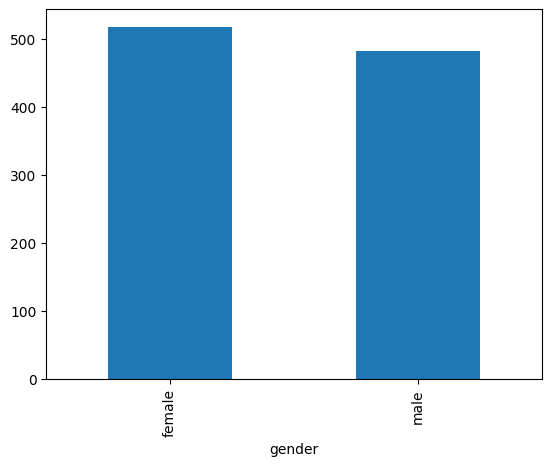

In [37]:
df.gender.value_counts().plot(kind='bar')

### For race/ethnicity column

<Axes: xlabel='race/ethnicity'>

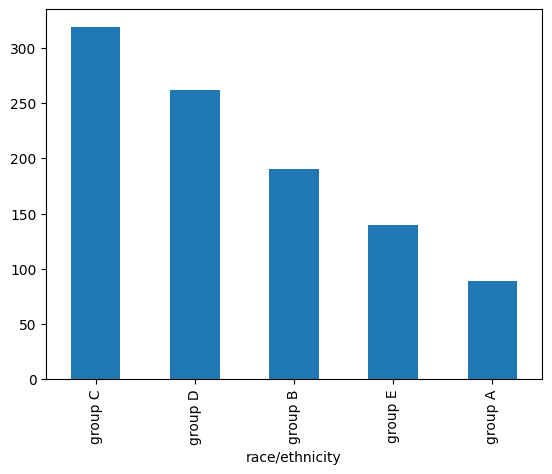

In [38]:
df['race/ethnicity'].value_counts().plot(kind='bar')

### For parental level of education	Column

<Axes: xlabel='parental level of education'>

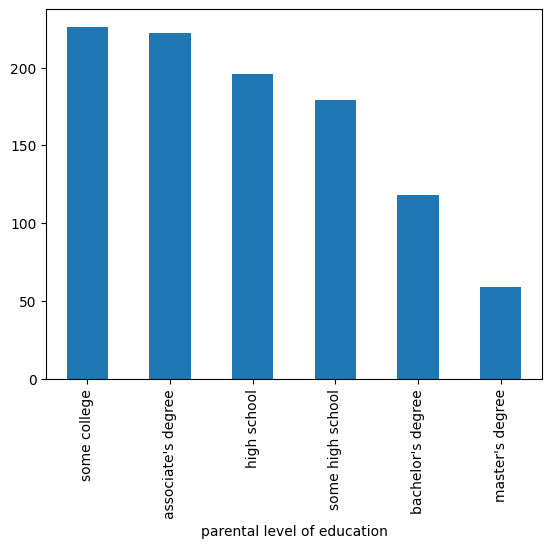

In [39]:
df['parental level of education'].value_counts().plot(kind='bar')

### For Lunch Column

<Axes: xlabel='lunch'>

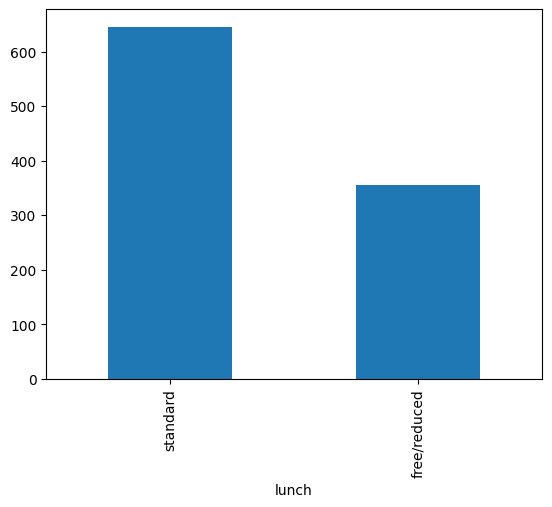

In [40]:
df.lunch.value_counts().plot(kind='bar')

### For test preparation course Column

<Axes: xlabel='test preparation course'>

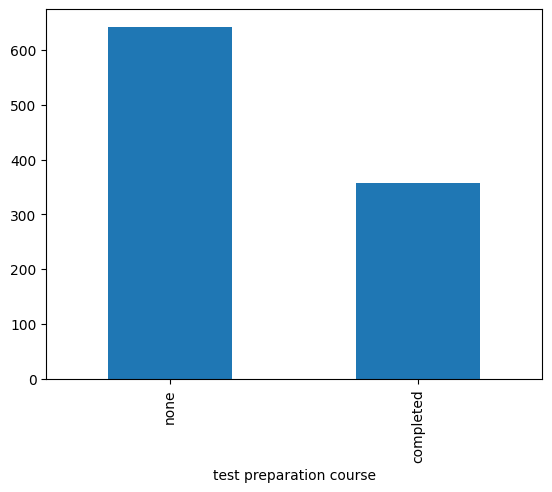

In [41]:
df['test preparation course'].value_counts().plot(kind='bar')

### Checking how many Numerical and Categorical Columns we have

In [42]:
num_col = df.select_dtypes('number').columns
cat_col = df.select_dtypes('object').columns

print(f'We have {len(num_col)} no of Numerical Columns')
print(f'We have {len(cat_col)} no of Categorical Columns')

We have 3 no of Numerical Columns
We have 5 no of Categorical Columns


## Creating some meaningfull features

In [43]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3

In [44]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Observing Students who have gained full marks

In [53]:
math_full_marks = df[df['math score'] == 100]['average'].count()
reading_full_marks = df[df['reading score'] == 100]['average'].count()
writing_full_marks = df[df['writing score'] == 100]['average'].count()

print(f"{math_full_marks} No of students who have gained full marks in Maths")
print(f"{reading_full_marks} No of students who have gained full marks in Reading")
print(f"{writing_full_marks} No of students who have gained full marks in Writing")

7 No of students who have gained full marks in Maths
17 No of students who have gained full marks in Reading
14 No of students who have gained full marks in Writing


### Observing Students who have gained zero marks

In [54]:
math_zero_marks = df[df['math score'] == 0]['average'].count()
reading_zero_marks = df[df['reading score'] == 0]['average'].count()
writing_zero_marks = df[df['writing score'] == 0]['average'].count()

print(f"{math_zero_marks} no of students have gained zero marks in Maths")
print(f"{reading_zero_marks} no of students have gained zero marks in reading")
print(f"{writing_zero_marks} no of students have gained zero marks in writing")

1 no of students have gained zero marks in Maths
0 no of students have gained zero marks in reading
0 no of students have gained zero marks in writing


### Observing Students who have failed

In [56]:
math_failed_students = df[df['math score'] < 45]['average'].count()
reading_failed_students = df[df['reading score'] < 45]['average'].count()
writing_failed_students = df[df['writing score'] < 45]['average'].count()

print(f'{math_failed_students} no of student have failed in Maths')
print(f'{reading_failed_students} no of student have failed in reading')
print(f'{writing_failed_students} no of student have failed in writing')

76 no of student have failed in Maths
53 no of student have failed in reading
70 no of student have failed in writing


### Observing Students who have just passed

In [57]:
math_passed_students = df[df['math score'] >= 45]['average'].count()
reading_passed_students = df[df['reading score'] >= 45]['average'].count()
writing_passed_students = df[df['writing score'] >= 45]['average'].count()

print(f'{math_passed_students} no of student have passed in Maths')
print(f'{reading_passed_students} no of student have passed in reading')
print(f'{writing_passed_students} no of student have passed in writing')

924 no of student have passed in Maths
947 no of student have passed in reading
930 no of student have passed in writing


# Exploratory Data (Visualization)

## (Univariate)

### visualizing the distribution of Average Score

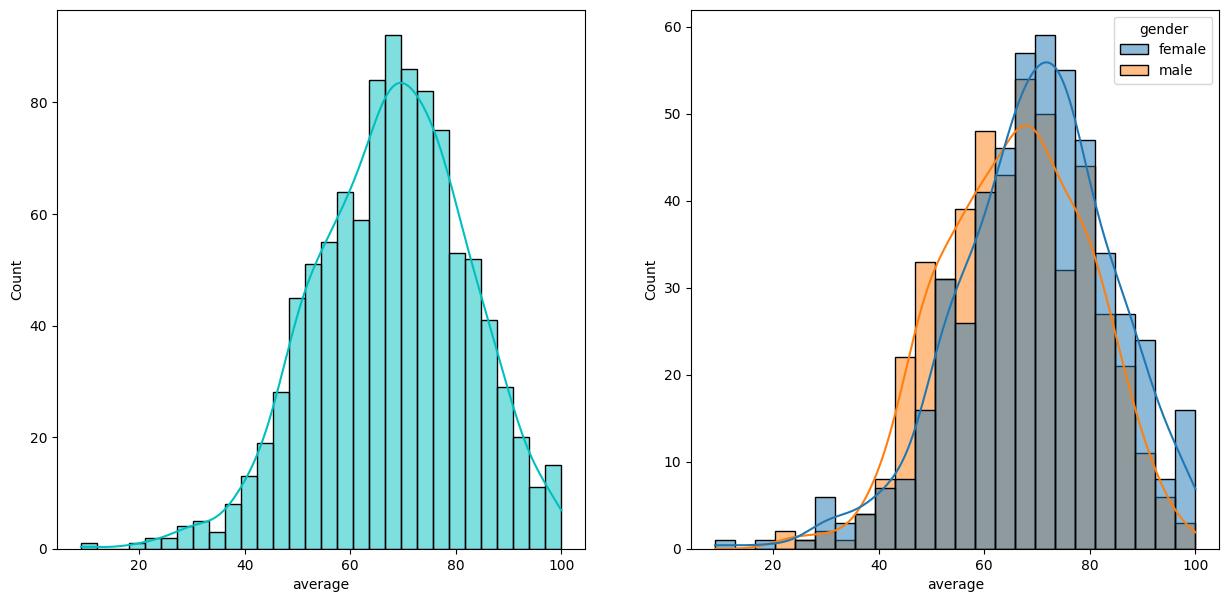

In [96]:
fig, ax = plt.subplots(1 , 2 , figsize=(15,7))
plt.subplot(121)
sns.histplot(df['average'], bins=30, kde=True, color='c')

plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

### Visualizing the distribution of Total Score 

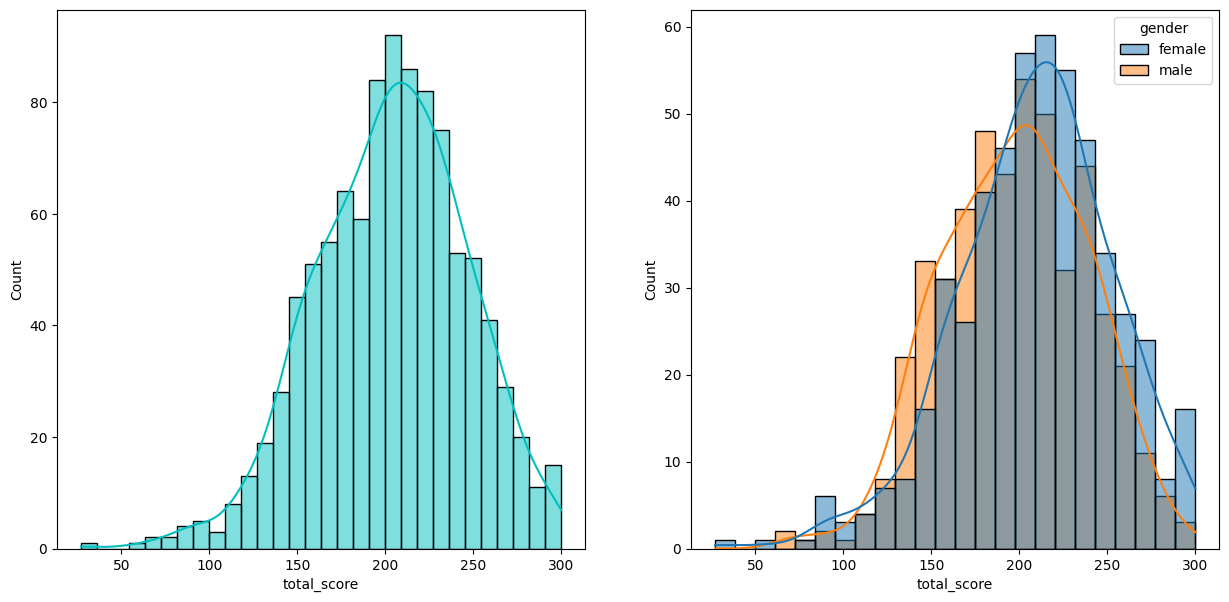

In [107]:
fig, ax = plt.subplots(1 , 2 , figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='c')

plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

### Visualizing Counts of test preparation course based on gender

<Axes: xlabel='test preparation course', ylabel='count'>

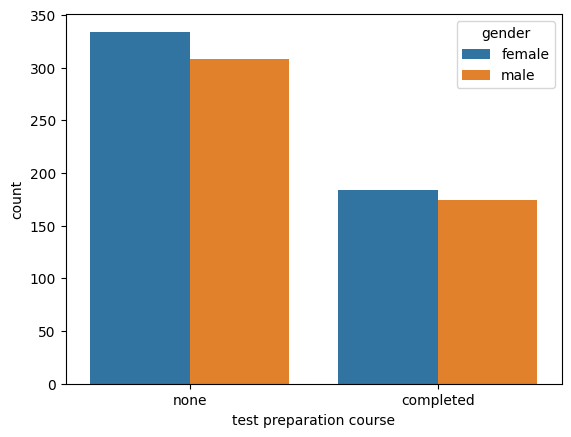

In [102]:
sns.countplot(data=df, x='test preparation course', hue='gender')

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_4000\3040176307.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_4000\3040176307.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_4000\3040176307.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

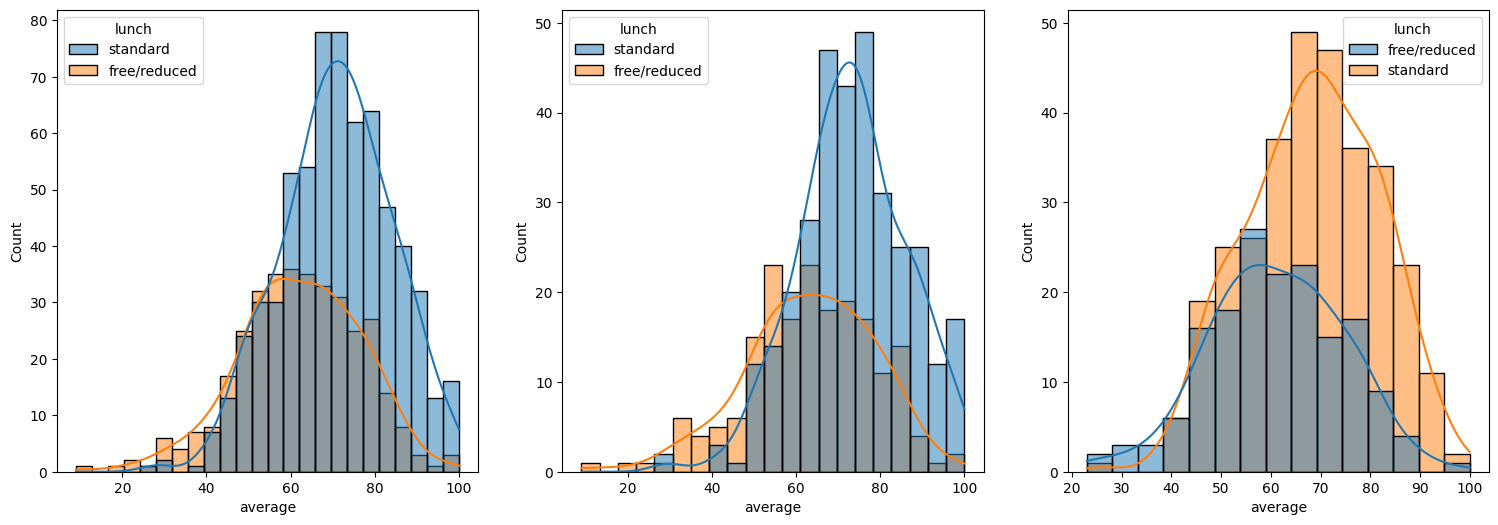

In [119]:
fig, ax = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average', hue='lunch', kde=True)

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average', hue='lunch', kde=True)

In [117]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_4000\3852100192.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_4000\3852100192.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_4000\3852100192.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

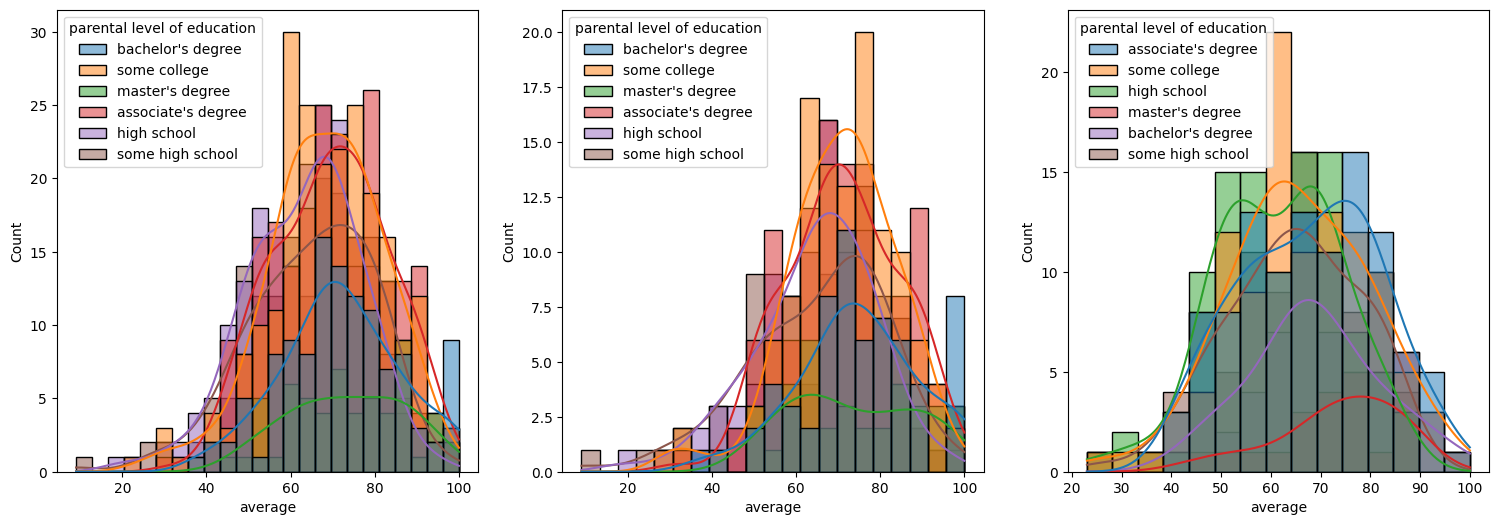

In [120]:
fig, ax = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average', hue='parental level of education', kde=True)

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average', hue='parental level of education', kde=True)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_4000\1994957097.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_4000\1994957097.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_4000\1994957097.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

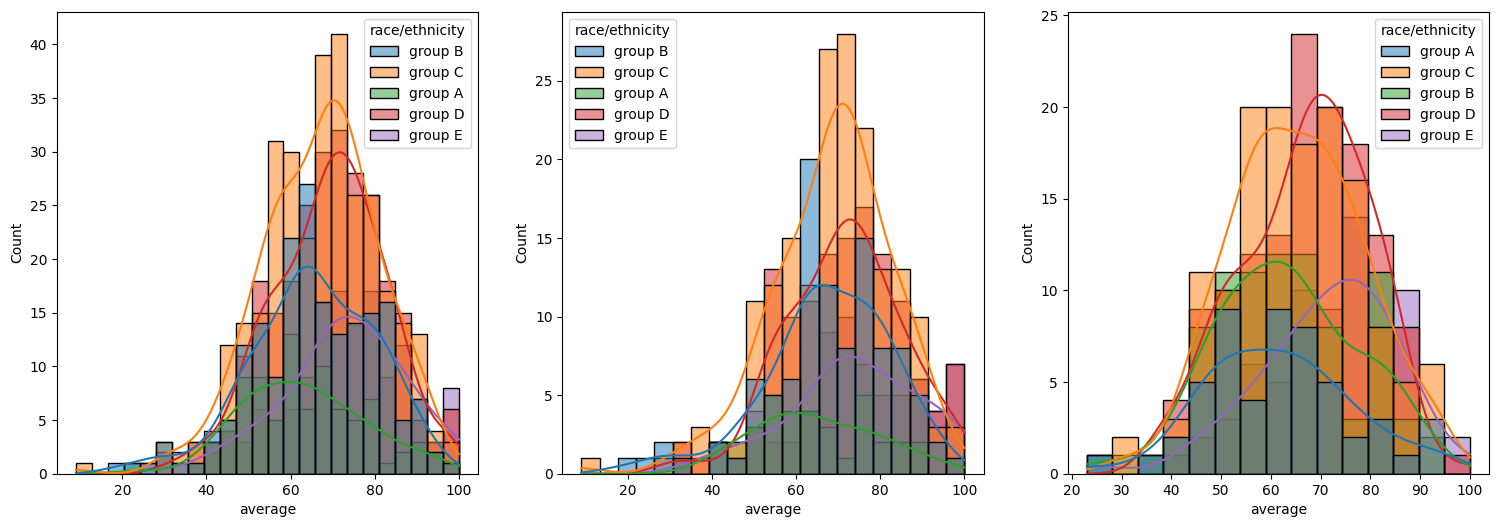

In [121]:
fig, ax = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average', hue='race/ethnicity', kde=True)

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average', hue='race/ethnicity', kde=True)

<Axes: title={'center': 'Writing-Score'}, ylabel='writing score'>

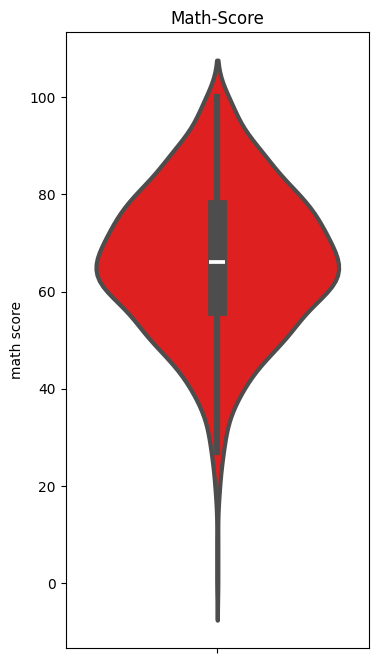

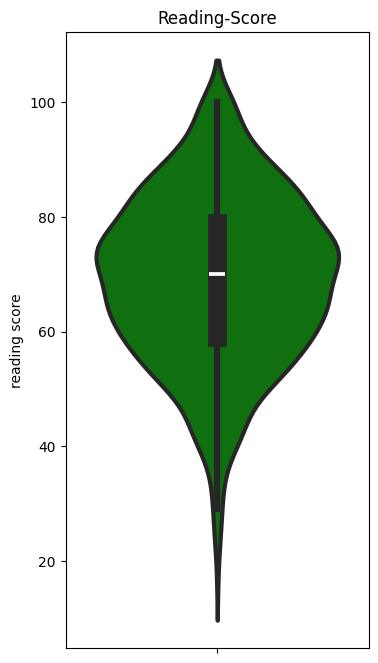

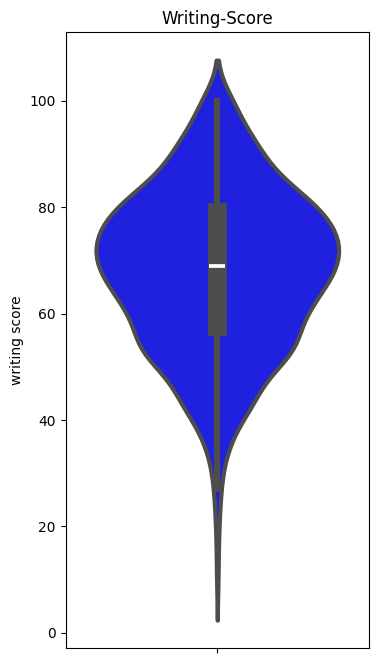

In [129]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math-Score')
sns.violinplot(data=df, y='math score', color='red', linewidth=3)

plt.figure(figsize=(18,8))
plt.subplot(1,4,2)
plt.title('Reading-Score')
sns.violinplot(data=df, y='reading score', color='green', linewidth=3)

plt.figure(figsize=(18,8))
plt.subplot(1,4,3)
plt.title('Writing-Score')
sns.violinplot(data=df, y='writing score', color='blue', linewidth=3)

# Multivariate Analysis

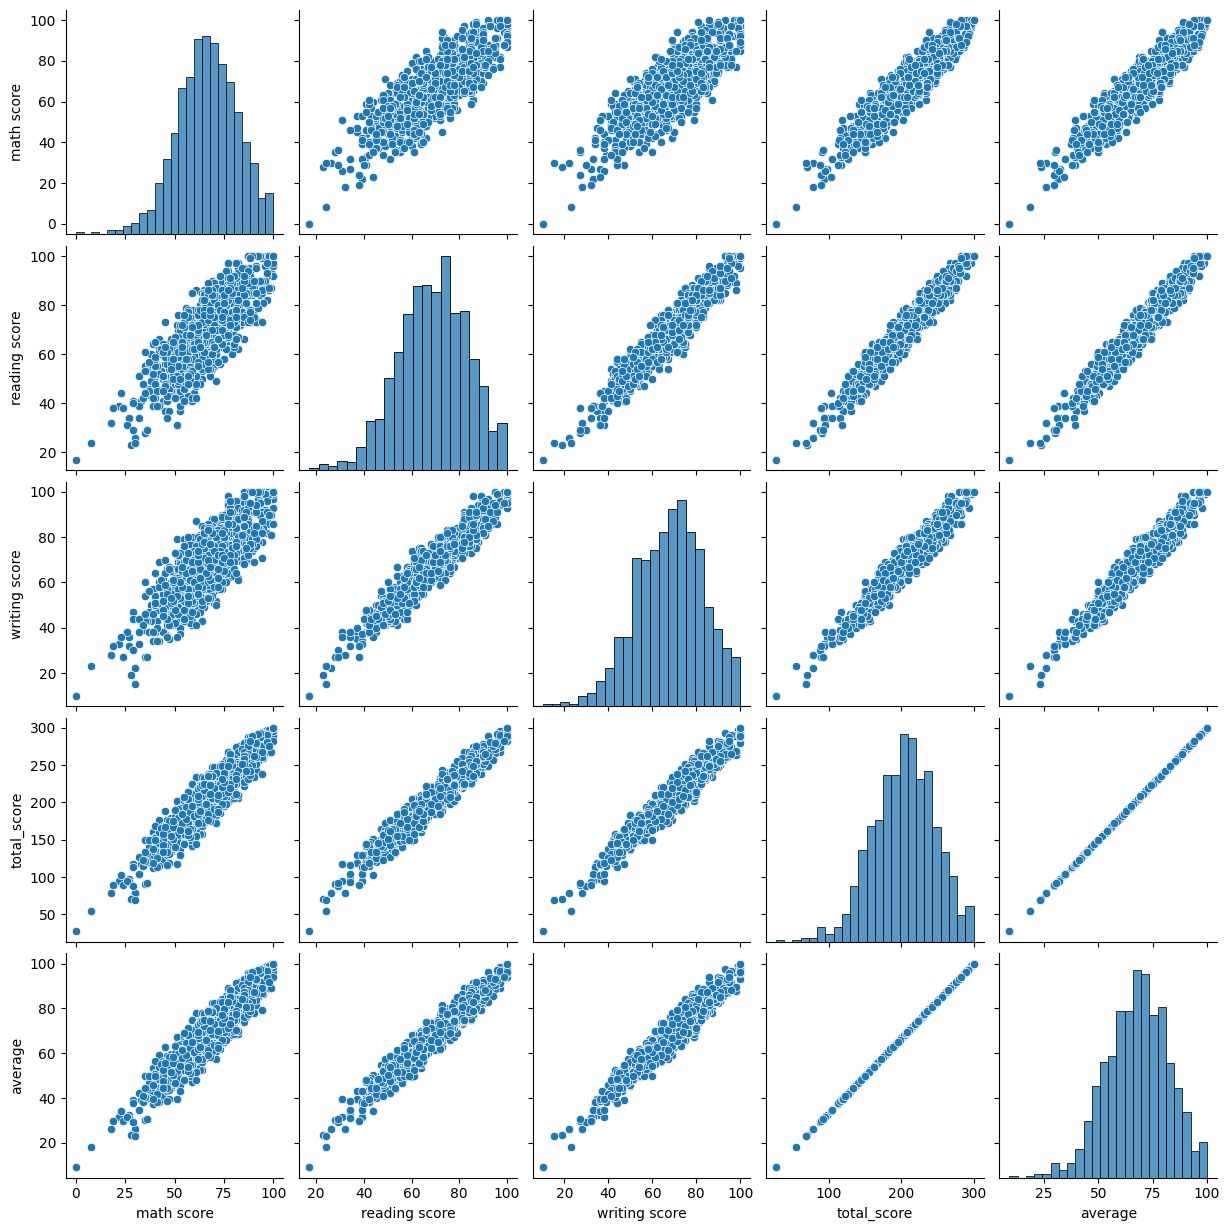

In [133]:
sns.pairplot(df)

<Axes: >

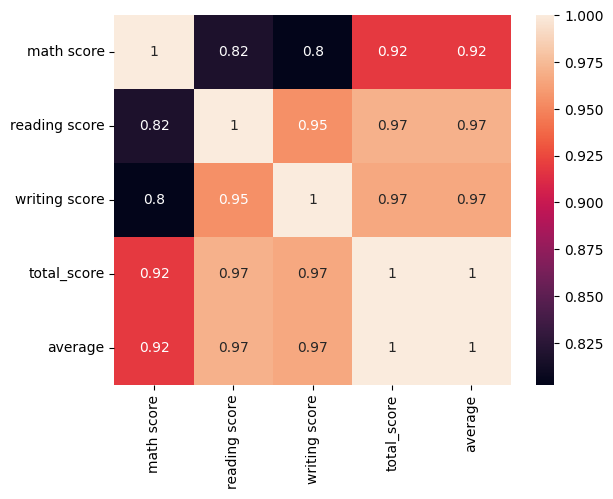

In [143]:
sns.heatmap(df[df.select_dtypes('number').columns].corr(), annot=True)

<Axes: title={'center': 'Writing - Average'}, xlabel='writing score', ylabel='average'>

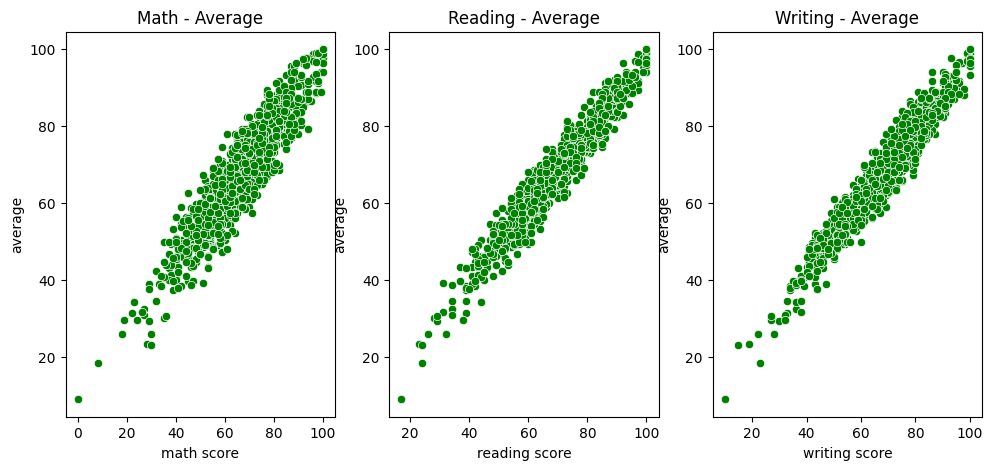

In [156]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.title('Math - Average')
sns.scatterplot(data=df, x='math score', y='average', color='g')

plt.subplot(1,4,2)
plt.title('Reading - Average')
sns.scatterplot(data=df, x='reading score', y='average', color='g')

plt.subplot(1,4,3)
plt.title('Writing - Average')
sns.scatterplot(data=df, x='writing score', y='average', color='g')

<Axes: title={'center': 'Writing - total score'}, xlabel='writing score', ylabel='total_score'>

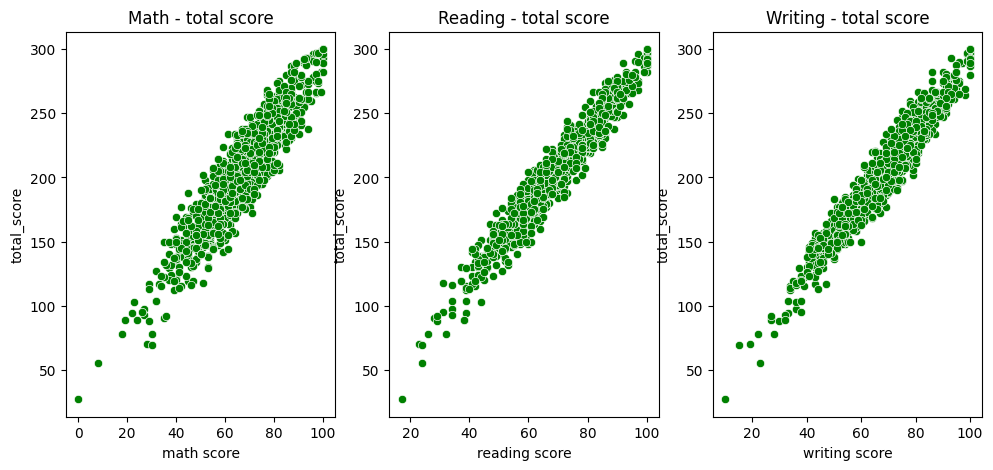

In [159]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.title('Math - total score')
sns.scatterplot(data=df, x='math score', y='total_score', color='g')

plt.subplot(1,4,2)
plt.title('Reading - total score')
sns.scatterplot(data=df, x='reading score', y='total_score', color='g')

plt.subplot(1,4,3)
plt.title('Writing - total score')
sns.scatterplot(data=df, x='writing score', y='total_score', color='g')

<Axes: title={'center': 'Writing - total score'}, xlabel='writing score', ylabel='total_score'>

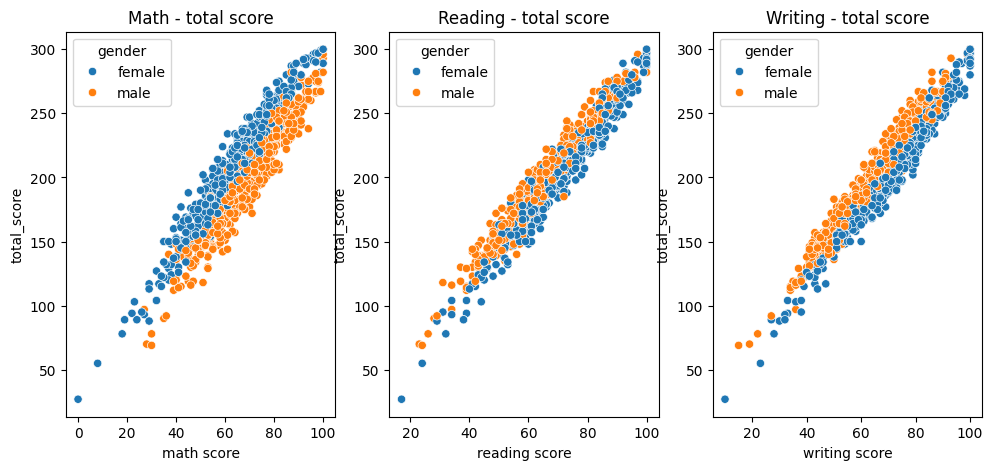

In [161]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.title('Math - total score')
sns.scatterplot(data=df, x='math score', y='total_score', color='g', hue='gender')

plt.subplot(1,4,2)
plt.title('Reading - total score')
sns.scatterplot(data=df, x='reading score', y='total_score', color='g', hue='gender')

plt.subplot(1,4,3)
plt.title('Writing - total score')
sns.scatterplot(data=df, x='writing score', y='total_score', color='g', hue='gender')

In [162]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<function matplotlib.pyplot.show(close=None, block=None)>

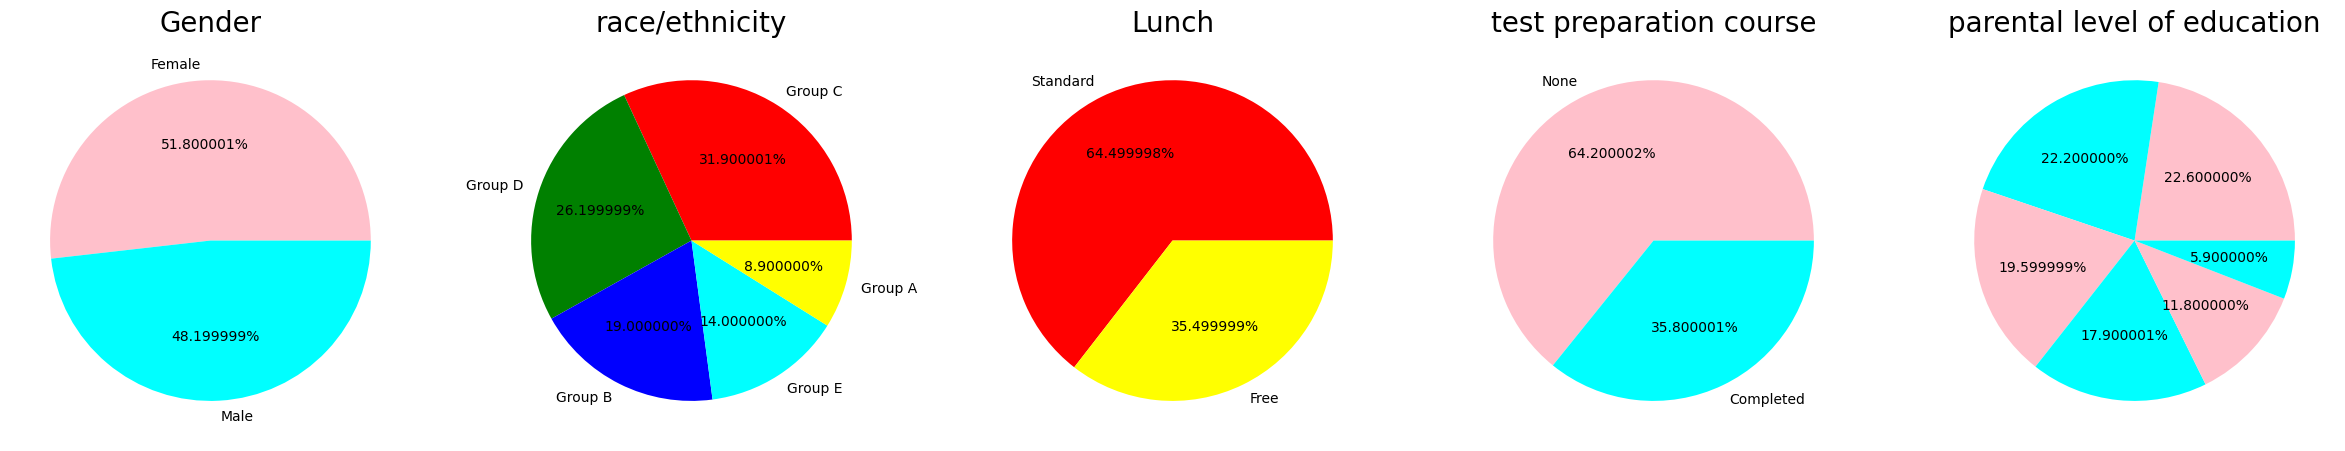

In [182]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['pink', 'cyan']

plt.pie(size, labels=labels, colors=color, autopct='%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'yellow']

plt.pie(size, labels=labels, colors=color, autopct='%2f%%')
plt.title('race/ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'yellow']

plt.pie(size, labels=labels, colors=color, autopct='%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['pink', 'cyan']

plt.pie(size, labels=labels, colors=color, autopct='%2f%%')
plt.title('test preparation course', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
# labels = 'Female', 'Male'

plt.pie(size, colors=color, autopct='%2f%%')
plt.title('parental level of education', fontsize=20)
plt.axis('off')

plt.show